In [61]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [3]:
tf.__version__

'2.12.0'

In [4]:
tf.keras.__version__

'2.12.0'

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [62]:
import os

In [63]:
mnist= tf.keras.datasets.mnist

In [65]:
(X_trian_full, Y_train_full) ,(X_test,Y_test) = mnist.load_data()

In [66]:
X_trian_full.shape

(60000, 28, 28)

In [10]:
X_trian_full.dtype

dtype('uint8')


mnist data contain data of handwritten digits in 2d array form with annot (annot means it will dsplay 0 to 1 values , 1 for dark black color 
                                                                           and zero for white color)
> Indented block



In [67]:
X_valid, X_train = X_trian_full[: 5000] / 255., X_trian_full[5000: ]/255.
y_valid, y_train = Y_train_full[: 5000], Y_train_full[5000:]

X_test = X_test/255.

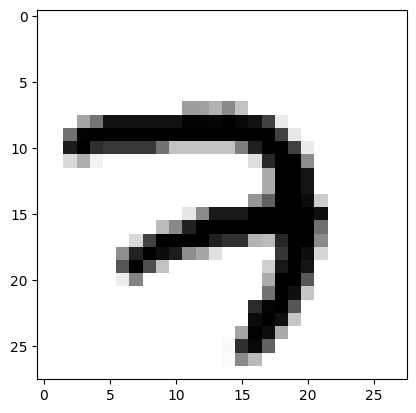

In [68]:
plt.imshow(X_train[0], cmap="binary")

plt.show()


<Axes: >

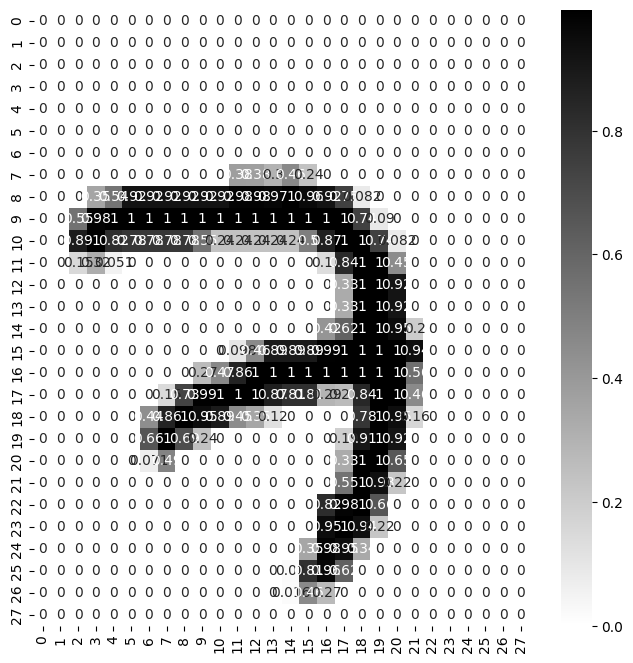

In [53]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(X_train[0], annot=True, cmap="binary")

**Writing samples to Tensorboard**

In [14]:
## Get unique timestamp

import time

def get_timestamp():
  return time.asctime().replace(" ", "_").replace(":", "")

In [15]:
def get_log_dir_path(log_dir="logs/fit"):
  log_path = os.path.join(log_dir, get_timestamp())
  print(f"logs will be saved at: {log_path}")
  return log_path

In [16]:
log_dir = get_log_dir_path()
file_writer = tf.summary.create_file_writer(logdir=log_dir)

logs will be saved at: logs/fit/Tue_Apr__4_060326_2023


In [17]:
with file_writer.as_default():
  images =  np.reshape(X_train[10:30],(-1,28,28,1))
  tf.summary.image("20 handwritten digits sample",images,max_outputs=25,step=0)

In [18]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

In [54]:
Layers=[
    tf.keras.layers.Flatten(input_shape=[28 , 28] , name='inputlayer'),
    tf.keras.layers.Dense(300 , activation="relu", name="hiddenlayer1"),
    tf.keras.layers.Dense(100 , activation="relu", name="hiddenlayer2"),
    tf.keras.layers.Dense(10 , activation="relu", name="outputlayer"),
]

In [55]:
model = tf.keras.models.Sequential(Layers)


In [56]:
model.layers

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
784 * 300 +300 , 300*100+100 , 100*10+10

(235500, 30100, 1010)

235500 + 30100 +1010 ===Total params

In [57]:
hidden1= model.layers[1]
model.get_layer(hidden1.name)

In [26]:
hidden1.get_weights()

[array([[-0.03408357, -0.03552195, -0.07240301, ...,  0.00316624,
         -0.06407326, -0.0238202 ],
        [-0.04843367, -0.01410745, -0.02834424, ..., -0.01075649,
         -0.06893484,  0.02768631],
        [-0.00559209,  0.01451916, -0.06587848, ..., -0.04176202,
         -0.06864592,  0.05019947],
        ...,
        [-0.02179541, -0.03389406, -0.06578997, ..., -0.0576203 ,
         -0.0267914 ,  0.03394218],
        [-0.02560074, -0.07413916,  0.06991872, ..., -0.01782209,
         -0.04854886,  0.04249339],
        [ 0.04623858, -0.03937832, -0.04219371, ...,  0.00682554,
          0.05289932,  0.06880525]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [58]:
weights, biases = hidden1.get_weights()

In [28]:
weights.shape

(784, 300)

In [29]:
biases.shape

(300,)

loss_function(actual,pred)=error

In [59]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


callbacks

In [31]:
tensorboard_cb =tf.keras.callbacks.TensorBoard(log_dir=log_dir)

early stopping

In [32]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

Checkpoint callback

In [33]:
CKPT_Path = "model_ckpt.h5"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_Path, save_best_only=True)

In [34]:
LIST_OF_CALLBACKS = [tensorboard_cb, early_stopping_cb, checkpoint_cb]

Epochs: Integer.

Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

batch_size: Integer or None.

Number of samples per gradient update. If unspecified, batch_size will default to 32.

NOTE: Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

validation_batch_size: Integer or None.

Number of samples per validation batch.

If unspecified, will default to batch_size.

NOTE: Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

In [60]:
# EPOCHS = 30
# VALIDATION_SET = (X_valid, y_valid)

# history = model.fit(X_train, y_train, 
#                     epochs=EPOCHS, 
#                     validation_data=VALIDATION_SET)

##create model with callbacks
EPOCHS = 300
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET, callbacks=LIST_OF_CALLBACKS)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 7.8280 - accuracy: 0.0982 - val_loss: 8.3486 - val_accuracy: 0.0924
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 8.2554 - accuracy: 0.0980 - val_loss: 8.3486 - val_accuracy: 0.0924
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2554 - accuracy: 0.0980 - val_loss: 8.3486 - val_accuracy: 0.0924
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 8.2554 - accuracy: 0.0980 - val_loss: 8.3486 - val_accuracy: 0.0924
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2554 - accuracy: 0.0980 - val_loss: 8.3486 - val_accuracy: 0.0924
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 8.2554 - accuracy: 0.0980 - val_loss: 8.3486 - val_accuracy: 0.0924
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2554 - accuracy: 0.0980 - val_loss: 8.3486 - val_accuracy:

In [44]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 9.6604 - accuracy: 0.0980


[9.660418510437012, 0.09799999743700027]

In [45]:
model.save("model.h5")


In [46]:
loaded_model = tf.keras.models.load_model("model.h5")


In [47]:
loaded_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 9.6604 - accuracy: 0.0980


[9.660418510437012, 0.09799999743700027]

In [48]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,9.699276,0.098982,9.936045,0.0958
1,9.699275,0.098982,9.936045,0.0958
2,9.699263,0.098982,9.936045,0.0958
3,9.699275,0.098982,9.936045,0.0958
4,9.699282,0.098982,9.936045,0.0958
5,9.699279,0.098982,9.936045,0.0958
6,9.699282,0.098982,9.936045,0.0958
7,9.699275,0.098982,9.936045,0.0958
8,9.699275,0.098982,9.936045,0.0958
9,9.699283,0.098982,9.936045,0.0958


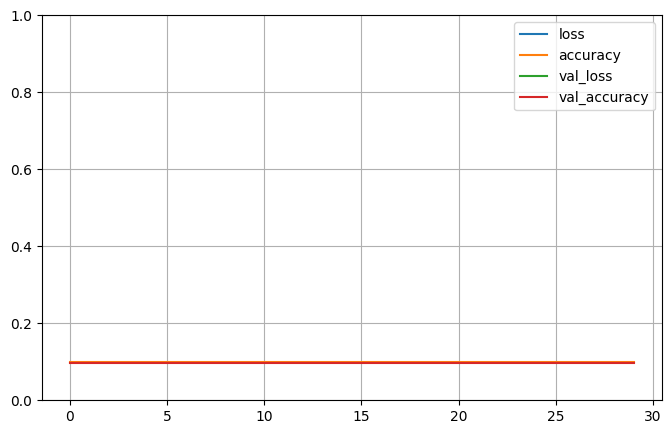

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()